# Project: Investigate a Movie Dataset (TMDb Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about nearly __11,000 movies__ collected __from The Movie Database__ (TMDb), including user ratings, popularity, budget and revenue, genre, runtime, release date, and others. The analysis consists of two reaserach parts with main leading question supporting by couple of sub-questions helping to answer the leading question.

The analysis consists of following:

##### Research Part 1: What features are associated with successful movie?
* Question 1: Do more popular movies receive better rating?
* Question 2: Do more popular movies cost more than less popular movies?
* Question 3: Do more popular movies earn more than less popular movies?
* Question 4: Is popularity impacted by release year or runtime?


##### Research Part 2: What features are associated with popular genre?

* Question 1: Which genres are most popular over years?
* Question 2: Which genres do earn the most? 

In [587]:
# Import of statements for all of the packages that I plan to use.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


Using Pandas, I will explore __tmdb-movies.csv__ in the Jupyter notebook to assess and gain understanding about characteristics of the datasets:

* number of samples and columns in dataset
2. duplicate rows in the dataset
3. features with missing values and zero values
4. datatypes of columns
5. number of non-null values for features in dataset
7. presentation of basic descriptive statistics of data

### General Movie-Dataset Properties 


In [588]:
# Load my data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

movies_data=pd.read_csv('tmdb-movies.csv')
movies_data.sample(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8546,18220,tt0114151,0.488458,0,0,Poison Ivy II: Lily,Alyssa Milano|Johnathon Schaech|Xander Berkele...,NaN,Anne Goursaud,Passion. Seduction. Betrayal. Lily wanted to b...,...,A young and naive college art student becomes ...,106,Drama|Thriller|Romance,New Line Cinema|CineTel Pictures|MG Entertainment,1/16/96,15,4.3,1996,0.0,0.0
1719,22683,tt1295085,0.263791,0,0,Gifted Hands: The Ben Carson Story,Cuba Gooding Jr.|Kimberly Elise|Aunjanue Ellis...,http://www.tnt.tv/movies/giftedhands/,Thomas Carter,NaN,...,Gifted Hands: The Ben Carson Story is a movie ...,86,Drama,The Hatchery|Sony Pictures Television|Magna Gl...,2/7/09,48,7.2,2009,0.0,0.0


In [589]:
# Number of samples and number of columns in the dataset
movies_data.shape

(10866, 21)

In [590]:
# Quick data overview showing count of non-null values and data type
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [591]:
# Features with missing values shown as sum
movies_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning Overview


From the data overview in previous section, we may see that the dataset includes 10 866 samples and 21 columns. From the data info we may conclude, that it contains columns with missing values but appropriate data type. High missing values are within columns as homepage, tagline, keywords, production companies. Those columns contain text value and will not be part of analysis as stated within introduction. Therefore, I decided to drop columns with high missing values and/or those which are unimportant from analysis point of view.

In [592]:
# Some collumns with missing values seem to be not important for analysis purposes (e.g. text is hard to analyse 
# and does not give any additional value), therefore I dropped the columns
movies_data.drop(columns=['imdb_id', 'homepage', 'keywords', 'production_companies', 'tagline',], inplace=True)


In [593]:
# Inspection of duplicate rows in dataset
sum(movies_data.duplicated())

1

In [594]:
# Show duplicate row
duplicated_row=movies_data.duplicated()
filter_duplicated_row=movies_data.loc[duplicated_row ,:]
filter_duplicated_row

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


In [595]:
# Drop duplicated row as duplicated amount is not significant
movies_data.drop_duplicates(inplace=True)


I made inspection for duplicated rows. Only one row was shown as duplicated. As it is not significant amount, I dropped the row.

In [596]:
# Check null values after data cleaning. Only small amount of samples within columns 'director' and 'genres' is missing (0.4% and 0.2% from 
# total amount), I decided to keep them within dataset as not significant distortion may occur
movies_data.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [597]:
# Number of samples and number of columns in the dataset after cleaning
movies_data.shape

(10865, 16)

### Data Cleaning Decision process

In [598]:
# Basic descriptive statistics
movies_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the table above, basic descriptive statistics, we may come across following:

1. __Popularity__ rises from minimum very close to zero up to close to number 33. As the movie data did not include any detail regarding popularity, I searched for more info on the internet. I found out that it is very important metric for TMDb as it helps to boost search results, adds and it combines various information (e.g. Number of votes for the day, Number of views for the day, Number of users who marked it as a "favourite" for the day, Number of users who added it to their "watchlist" for the day, etc.). Source: [Themoviedb](https://developers.themoviedb.org/3/getting-started/popularity#movies)

2. __Budget/Revenue__ columns include zero values. The question is if budget/revenue of movies should be really zero or it is missing value instead. I made inspection of revenue and budget columns as both will be part of further analysis. Inspection of data is given below. 

    I randomly selected one film _American Flyers_ which showed in the dataset that the budget was zero. I tried to inspect if it was really true statement. Based on wikipedia, the budget of the movie was $8.5 mio, therefore I assumed that, zero value in 'budget' column was missing value.

    I randomly selected another film _Avenging Angelo_ which showed that the revenue was zero and inspected if it was really true statement. Based on wikipedia, the revenue of the movie was $825 ths, therefore I assumed that, zero value in 'revenue' column was missing value.

    From the quick analysis below, I found out that zero values in the 'budget' column represent around 5.5 thousand samples and in the 'revenue' column more than 6 thousand samples. It is quite large amount of data just to drop. As I would be left with dataset of 3 thousand samples only, instead of originally more than 10 thousand samples, I decided not to drop samples with zero values and convert them to NaN values. Due to possible cause of huge distortion during futher analysis which would not cover revenue/budget related questions. Source (American Flyers): [Wikipedia](https://en.wikipedia.org/wiki/American_Flyers), 
Source (Avenging Angelo): [Wikipedia](https://en.wikipedia.org/wiki/Avenging_Angelo#cite_note-mojo-1)

3. __Runtime column__ of the dataset shows 31 samples which have zero value, what is obviously missing value. As it is only 0.3% of the dataset, I decided to drop them.

4. __Vote_count__ and __vote_average__ seem reasonable.

5. __Release date__ seems reasonable.

In [599]:
# Inspection of zero values in column budget

movies_data_insp_budget=movies_data[movies_data.budget==0]
movies_data_insp_budget.sample(3)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9048,17337,0.556051,0,0,The Land Before Time VI: The Secret of Saurus ...,Thomas Dekker|Kenneth Mars|Anndi McAfee|Aria C...,Charles Grosvenor,Legends claim that Saurus Rock keeps bad luck ...,77,Family|Animation,12/1/98,24,5.5,1998,0.0,0.0
3734,75345,0.263732,0,0,I Melt with You,Thomas Jane|Jeremy Piven|Rob Lowe|Christian Mc...,Mark Pellington,Former college friends meet up for a reunion t...,129,Drama|Thriller,12/9/11,17,5.9,2011,0.0,0.0
3597,86812,0.486641,0,0,Sound of My Voice,Brit Marling|Christopher Denham|Nicole Vicius|...,Zal Batmanglij,A journalist and his girlfriend get pulled in ...,85,Science Fiction|Drama|Mystery,1/22/11,46,5.7,2011,0.0,0.0


In [600]:
movies_data_insp_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 30 to 10864
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              5696 non-null   int64  
 1   popularity      5696 non-null   float64
 2   budget          5696 non-null   int64  
 3   revenue         5696 non-null   int64  
 4   original_title  5696 non-null   object 
 5   cast            5631 non-null   object 
 6   director        5656 non-null   object 
 7   overview        5692 non-null   object 
 8   runtime         5696 non-null   int64  
 9   genres          5674 non-null   object 
 10  release_date    5696 non-null   object 
 11  vote_count      5696 non-null   int64  
 12  vote_average    5696 non-null   float64
 13  release_year    5696 non-null   int64  
 14  budget_adj      5696 non-null   float64
 15  revenue_adj     5696 non-null   float64
dtypes: float64(4), int64(6), object(6)
memory usage: 756.5+ KB


In [601]:
# Inspection of zero values in column revenue

movies_data_insp_revenue=movies_data[movies_data.revenue==0]
movies_data_insp_revenue.sample(3)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1125,295799,0.194283,0,0,Iris,Iris Apfel|Carl Apfel,Albert Maysles,IRIS pairs legendary 87-year-old documentarian...,83,Documentary,10/9/14,34,7.5,2014,0.0,0.0
9903,26638,0.185261,0,0,Il deserto rosso,Monica Vitti|Richard Harris|Carlo Chionetti|Xe...,Michelangelo Antonioni,Amid the modern wastelands and toxic factories...,120,Drama,9/4/64,26,6.8,1964,0.0,0.0
4931,114887,0.004575,0,0,The Dream Team,Michael Jordan|Larry Bird|Magic Johnson|Charle...,Zak Levitt,The world had rarely seen a frenzy as the one ...,70,Documentary,6/13/12,11,8.0,2012,0.0,0.0


In [602]:
movies_data_insp_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 48 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              6016 non-null   int64  
 1   popularity      6016 non-null   float64
 2   budget          6016 non-null   int64  
 3   revenue         6016 non-null   int64  
 4   original_title  6016 non-null   object 
 5   cast            5945 non-null   object 
 6   director        5973 non-null   object 
 7   overview        6012 non-null   object 
 8   runtime         6016 non-null   int64  
 9   genres          5993 non-null   object 
 10  release_date    6016 non-null   object 
 11  vote_count      6016 non-null   int64  
 12  vote_average    6016 non-null   float64
 13  release_year    6016 non-null   int64  
 14  budget_adj      6016 non-null   float64
 15  revenue_adj     6016 non-null   float64
dtypes: float64(4), int64(6), object(6)
memory usage: 799.0+ KB


In [603]:
# Inspection of runtime

movies_data_insp_runtime=movies_data[movies_data.runtime==0]
movies_data_insp_runtime.sample(3)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6383,26985,0.371630,2000000,0,The 12 Dogs of Christmas,Jordan-Claire Green|Tom Kemp|Susan Wood|Adam H...,Kieth Merrill,This holiday tale has all the elements of a cl...,0,Drama|Family,11/1/05,11,4.7,2005,2.233127e+06,0.0
6552,13739,0.006440,0,0,Quatre Ã©toiles,JosÃ© Garcia|Isabelle CarrÃ©|RenÃ©e Le Calm|Fr...,Christian Vincent,No overview found.,0,Comedy,1/1/05,15,5.9,2005,0.000000e+00,0.0
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,Filmed over 14 months with unprecedented acces...,0,Documentary,11/9/15,80,6.5,2015,0.000000e+00,0.0


In [604]:
movies_data_insp_runtime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 92 to 8874
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              31 non-null     int64  
 1   popularity      31 non-null     float64
 2   budget          31 non-null     int64  
 3   revenue         31 non-null     int64  
 4   original_title  31 non-null     object 
 5   cast            31 non-null     object 
 6   director        29 non-null     object 
 7   overview        29 non-null     object 
 8   runtime         31 non-null     int64  
 9   genres          30 non-null     object 
 10  release_date    31 non-null     object 
 11  vote_count      31 non-null     int64  
 12  vote_average    31 non-null     float64
 13  release_year    31 non-null     int64  
 14  budget_adj      31 non-null     float64
 15  revenue_adj     31 non-null     float64
dtypes: float64(4), int64(6), object(6)
memory usage: 4.1+ KB


### Data Cleaning Decision Summary

Based on the decision process above, I conclude following:
* Conversion of zero values to Nan values in columns Budget/Revenue
* Drop 31 samples where runtime is zero value

In [605]:
# Conversion of zero values to NaN
movies_data['budget'] = movies_data['budget'].replace(0, np.NaN)


In [606]:
# Conversion of zero values to NaN
movies_data['revenue'] = movies_data['revenue'].replace(0, np.NaN)

In [607]:
# Inspection of change
movies_data[movies_data['budget']==0]

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [608]:
# Inspection of change
movies_data[movies_data['revenue']==0]

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [609]:
# Drop zero values in Runtime column
movies_data.drop(movies_data[movies_data['runtime'] == 0].index, inplace = True) 

In [610]:
# Final dataset information, after data cleaning
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10834 non-null  int64  
 1   popularity      10834 non-null  float64
 2   budget          5166 non-null   float64
 3   revenue         4849 non-null   float64
 4   original_title  10834 non-null  object 
 5   cast            10758 non-null  object 
 6   director        10792 non-null  object 
 7   overview        10832 non-null  object 
 8   runtime         10834 non-null  int64  
 9   genres          10812 non-null  object 
 10  release_date    10834 non-null  object 
 11  vote_count      10834 non-null  int64  
 12  vote_average    10834 non-null  float64
 13  release_year    10834 non-null  int64  
 14  budget_adj      10834 non-null  float64
 15  revenue_adj     10834 non-null  float64
dtypes: float64(6), int64(4), object(6)
memory usage: 1.4+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Part 1: What features are associated with successful movie?
##### Question 1: Do more popular movies receive better rating?
##### Question 2: Do more popular movies cost more than less popular movies?
##### Question 3: Do more popular movies earn more than less popular movies?
##### Question 4: Is popularity impacted by release year or runtime?

In [611]:
# Just to remind the structure of dataset I am working with
movies_data.sample(3)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
525,360605,0.136098,NaN,NaN,Invisible Sister,Rowan Blanchard|Paris Berelc|Karan Brar|France...,Paul Hoen,Teenager Cleo's school science project goes qu...,77,Fantasy|Adventure|Comedy,10/9/15,44,6.5,2015,0.000000e+00,0.0
4931,114887,0.004575,NaN,NaN,The Dream Team,Michael Jordan|Larry Bird|Magic Johnson|Charle...,Zak Levitt,The world had rarely seen a frenzy as the one ...,70,Documentary,6/13/12,11,8.0,2012,0.000000e+00,0.0
3500,64586,0.851701,10000000.0,NaN,Sleeping Beauty,Emily Browning|Rachael Blake|Ewen Leslie|Mirra...,Julia Leigh,"A haunting erotic fairytale about Lucy, a youn...",102,Drama|Romance,6/10/11,100,5.4,2011,9.693980e+06,0.0


#### Question 1: Do more popular movies receive better rating?

In this section, I am going to answer the question using query in order to split dataset to two parts:
1. Low vote_average (samples with vote_average content less than the median)
2. High vote_average (samples with vote_average content greater than or equal to the median)

Then, find the mean popularity rating of each group.

In [612]:
# Get the median amount of 'vote_average'
movies_data['vote_average'].median()

6.0

In [613]:
# Select samples with popularity less than the median
low_vote_average =movies_data.query('vote_average<6.0')

# Select samples with popularity greater than or equal to the median
high_vote_average =movies_data.query('vote_average>=6.0')

# Ensure these queries included each sample exactly once
num_samples = movies_data.shape[0]
num_samples == low_vote_average['popularity'].count() + high_vote_average['popularity'].count() # should be True

True

In [614]:
# Average of popularity based on low_vote_average data 
low_popularity=low_vote_average.popularity.mean()
low_popularity

0.4796487421471176

In [615]:
# Average of popularity based on high_vote_average data 
high_popularity=high_vote_average.popularity.mean()
high_popularity

0.7934560713301175

Based on the analysis above, movies with better movie rating (equal or above median) are more popular (mean= 0.79). Movies with lower movie rating (less than median) are less popular (mean=0.48).
This stress the importance of movie ratings as it is probable that movie fans take into consideration movie rating when deciding what to watch.

#### Question 2: Do more popular movies cost more than less popular movies?

In this section, I am going to answer the question using query in order to split dataset to __budget levels__ using descriptive statistics:
    1. Low budget level (up to 25%)
    2. Moderately_Low budget level (25% up to 50%)
    2. Medium budget level (50% <=75%)
    3. High budget level (more 75%)
Then, find the mean of popularity rating of each budget level with groupby.

In [616]:
# View the min, 25%, 50%, 75%, max budget values with Pandas describe
movies_data['budget'].describe()

count    5.166000e+03
mean     3.075525e+07
std      3.891025e+07
min      1.000000e+00
25%      6.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [617]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [1.000000e+00, 6.000000e+06,1.700000e+07,4.000000e+07,4.250000e+08 ] # Fill in this list with five values I just found

In [618]:
# Labels for the four budget level groups
bin_names = ['Low', 'Moderately_Low', 'Medium', 'High' ] # Name each budget level category

In [619]:
# Creates budget_levels column
movies_data['budget_levels'] = pd.cut(movies_data['budget'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
movies_data.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,High
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,High
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,High
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,High
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,High


In [620]:
# Find the mean popularity of each budget level with groupby
movies_data.groupby('budget_levels').mean().popularity

budget_levels
Low               0.507570
Moderately_Low    0.726641
Medium            0.986812
High              1.821742
Name: popularity, dtype: float64

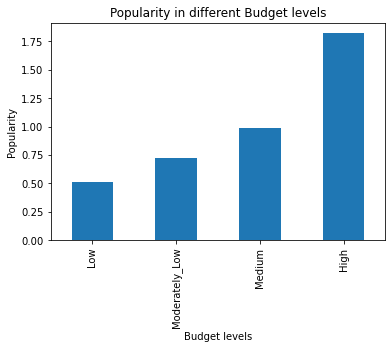

In [621]:
# Draw Bar chart
movies_data.groupby('budget_levels').mean().popularity.plot(kind='bar')

# title and labels
plt.ylabel('Popularity')
plt.xlabel('Budget levels')
plt.title('Popularity in different Budget levels');


In [622]:
# Additional information for better understanding of dataset
movies_data.groupby('budget_levels').sum().budget

budget_levels
Low               3.499597e+09
Moderately_Low    1.407651e+10
Medium            3.812556e+10
High              1.031799e+11
Name: budget, dtype: float64

In [623]:
# Additional information for better understanding of dataset
movies_data.groupby('budget_levels').mean().budget

budget_levels
Low               2.596140e+06
Moderately_Low    1.139799e+07
Medium            2.762722e+07
High              8.605500e+07
Name: budget, dtype: float64

Based on analysis above, we may conclude that higher movie budget results in higher popularity. More expensive movies are probably linked to higher quality expectations, promo campaigns, etc. resulting in higher popularity.


#### Question 3: Do more popular movies earn more than less popular movies?

In this section, I am going to answer the question using query in order to split dataset to __revenue levels__ using descriptive statistics:
    1. Low revenue level (up to 25%)
    2. Moderately_Low revenue level (25% up to 50%)
    2. Medium revenue level (50% <=75%)
    3. High revenuet level (more 75%)
Then, find the mean of popularity rating of each revenue level with groupby.

In [624]:
# View the min, 25%, 50%, 75%, max revenue values with Pandas describe
movies_data['revenue'].describe()

count    4.849000e+03
mean     8.923886e+07
std      1.620801e+08
min      2.000000e+00
25%      7.732325e+06
50%      3.185308e+07
75%      9.996575e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [625]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.000000e+00, 7.732325e+06,3.185308e+07,9.996575e+07,2.781506e+09 ] # Fill in this list with five values I just found

In [626]:
# Labels for the four revenue level groups
bin_names = ['Low', 'Moderately_Low', 'Medium', 'High' ] # Name each budget level category

In [627]:
# Creates revenue_levels column
movies_data['revenue_levels'] = pd.cut(movies_data['revenue'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
movies_data.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_levels,revenue_levels
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,High,High
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,High,High
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,High,High
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,High,High
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,High,High


In [628]:
# Find the mean popularity of each revenue level with groupby
movies_data.groupby('revenue_levels').mean().popularity

revenue_levels
Low               0.471294
Moderately_Low    0.630087
Medium            0.969795
High              2.109104
Name: popularity, dtype: float64

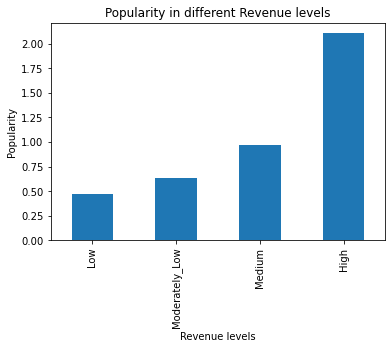

In [629]:
# Draw Bar chart
movies_data.groupby('revenue_levels').mean().popularity.plot(kind='bar')

# title and labels
plt.ylabel('Popularity')
plt.xlabel('Revenue levels')
plt.title('Popularity in different Revenue levels');

In [630]:
# Additional information for better understanding of dataset - sum of revenue in each revenue level in $
movies_data.groupby('revenue_levels').sum().revenue

revenue_levels
Low               2.804950e+09
Moderately_Low    2.205578e+10
Medium            7.091305e+10
High              3.369454e+11
Name: revenue, dtype: float64

In [631]:
# Additional information for better understanding of dataset - average of revenue in each revenue level in $
movies_data.groupby('revenue_levels').mean().revenue

revenue_levels
Low               2.316227e+06
Moderately_Low    1.819784e+07
Medium            5.855743e+07
High              2.777786e+08
Name: revenue, dtype: float64

From the bar chart, we may see that the most popular movies earned (high revenue level) in total nearly the same as movies less popular within rest revenue (low till medium revenue level) levels. We may say that more popular movie, higher revenue earned.

#### Question 4: Is popularity impacted by release year or runtime?

For better understanding the relationship of variables, I will use only charts to demonstrate their mutual dependencies/not dependencies.

##### Is popularity impacted by release year?

In [632]:
# Popularity mean and median based on release year is calculated
popularity_mean=movies_data.groupby('release_year').mean().popularity
popularity_median=movies_data.groupby('release_year').median().popularity


In [633]:
# Use_index location for x-axis
index_mean = popularity_mean.index
index_median = popularity_median.index

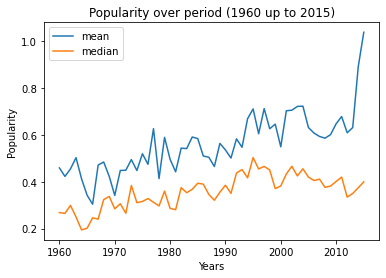

In [634]:
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_mean, popularity_mean
x2, y2 = index_median, popularity_median

#plot line chart for mean and median
plt.plot(x1, y1, label = 'mean')
plt.plot(x2, y2, label = 'median')

# title and labels
plt.ylabel('Popularity')
plt.xlabel('Years')
plt.title('Popularity over period (1960 up to 2015)')

#legend
# legend
plt.legend();

From the plot above, we may assume that the popularity trend is increasing over period. What is in line with expectations and huge technological development over years contributing to easier access to movies.

##### Is popularity (in terms of movie rating) impacted by movie runtime?

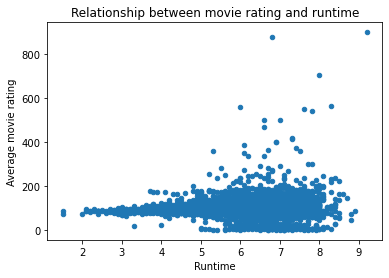

In [635]:
# Popularity expressed by movie rating vs. movie's runtime

movies_data.plot(x='vote_average', y='runtime', kind='scatter')

# title and labels
plt.ylabel('Average movie rating')
plt.xlabel('Runtime')
plt.title('Relationship between movie rating and runtime');

We may conclude that there is no relationship between popularity and runtime of the movie. The scatter plot shows no dependencies.

### Research Part 2: What features are associated with popular genre?

##### Question 1: Which genres are most popular over years?
##### Question 2: Which genres do earn the most? 


#### Question 1: Which genres are most popular over years?

Firstly, I needed to adjust column 'genres' and assign to release year. For preparation of final data, I used pivot table.

In [636]:
# Ensure that genre is string
movies_data.genres=movies_data.genres.astype(str)

In [637]:
# Import data
df=movies_data[['release_year', 'genres']]

In [638]:
# Step 1
# We start with creating a new dataframe from the series with Year as the index
new_df = pd.DataFrame(df.genres.str.split('|').tolist(), index=df.release_year).stack()

In [639]:
# Step 2
# We now want to get rid of the secondary index
# To do this, we will make Year as a column (it can't be an index since the values will be duplicate)
new_df = new_df.reset_index([0, 'release_year'])

In [640]:
# Step 3
# The final step is to set the column names as we want them
new_df.columns = ['release_year', 'genres']

In [641]:
# New dataset inspection
new_df.head()

,release_year,genres
0,2015,Action
1,2015,Adventure
2,2015,Science Fiction
3,2015,Thriller
4,2015,Action


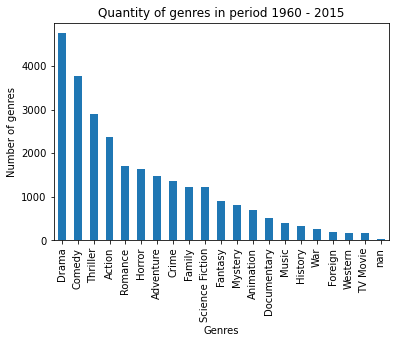

In [642]:
# Quantity of genres from 1960 up to 2015
new_df['genres'].value_counts().plot(kind='bar')

# title and labels
plt.ylabel('Number of genres')
plt.xlabel('Genres')
plt.title('Quantity of genres in period 1960 - 2015');


In [643]:
# Count of genres over the period up to 2015
df_pivot = new_df.pivot_table(index=['genres'], columns='release_year', values='genres', aggfunc=[len])
df_pivot

len                                                        \
release_year     1960  1961  1962  1963  1964  1965  1966  1967  1968  1969   
genres                                                                        
Action            8.0   7.0   8.0   4.0   5.0   9.0  14.0   7.0   6.0  10.0   
Adventure         5.0   6.0   7.0   7.0   5.0   6.0  11.0   7.0   5.0   5.0   
Animation         NaN   1.0   NaN   1.0   2.0   1.0   3.0   2.0   3.0   3.0   
Comedy            8.0  10.0   5.0  13.0  16.0   7.0  16.0  17.0   9.0  12.0   
Crime             2.0   2.0   3.0   4.0  10.0   2.0   5.0   7.0   5.0   3.0   
Documentary       NaN   NaN   NaN   NaN   NaN   NaN   1.0   1.0   NaN   NaN   
Drama            13.0  16.0  21.0  13.0  20.0  20.0  16.0  16.0  20.0  13.0   
Family            3.0   5.0   2.0   3.0   4.0   3.0   7.0   3.0   5.0   4.0   
Fantasy           2.0   2.0   1.0   2.0   4.0   NaN   2.0   3.0   5.0   2.0   
Foreign           1.0   1.0   1.0   2.0   1.0   1.0   2.0   NaN   NaN   NaN   
History           5.0   3.0   4.0   4.0   3.0   4.0   2.0   NaN   3.0   3.0   
Horror            7.0   3.0   5.0   9.0   6.0   5.0   3.0   4.0   4.0   1.0   
Music             1.0   2.0   1.0   NaN   5.0   2.0   NaN   5.0   3.0   2.0   
Mystery           NaN   1.0   4.0   6.0   4.0   3.0   6.0   3.0   4.0   1.0   
Romance           6.0   7.0   5.0   8.0   9.0   5.0   6.0  11.0   6.0   4.0   
Science Fiction   3.0   4.0   2.0   2.0   4.0   2.0   6.0   4.0   4.0   3.0   
TV Movie          NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   1.0   
Thriller          6.0   NaN   7.0  10.0   9.0  11.0   8.0   5.0   5.0   3.0   
War               2.0   2.0   3.0   1.0   3.0   8.0   4.0   1.0   4.0   3.0   
Western           6.0   3.0   3.0   2.0   1.0   4.0   7.0   2.0   1.0   7.0   
nan               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                 ...                                                          \
release_year     ...   2006   2007   2008   2009   2010   2011   2012   2013   
genres           ...                                                           
Action           ...   80.0   95.0   99.0  108.0  107.0  115.0   99.0  121.0   
Adventure        ...   55.0   60.0   63.0   72.0   59.0   62.0   50.0   67.0   
Animation        ...   39.0   32.0   33.0   48.0   50.0   46.0   40.0   42.0   
Comedy           ...  154.0  151.0  169.0  198.0  169.0  172.0  174.0  172.0   
Crime            ...   53.0   65.0   62.0   52.0   50.0   48.0   54.0   70.0   
Documentary      ...   16.0   19.0   26.0   25.0   35.0   49.0   49.0   61.0   
Drama            ...  197.0  197.0  233.0  223.0  209.0  214.0  231.0  253.0   
Family           ...   65.0   45.0   55.0   60.0   55.0   72.0   42.0   48.0   
Fantasy          ...   34.0   47.0   43.0   49.0   44.0   46.0   34.0   39.0   
Foreign          ...   10.0   17.0   18.0   17.0   13.0   14.0    6.0    NaN   
History          ...   12.0   13.0   24.0   16.0   14.0    8.0   13.0   14.0   
Horror           ...   56.0   79.0   76.0   90.0   78.0   77.0  104.0   99.0   
Music            ...   12.0   15.0   20.0   16.0    9.0   16.0   22.0   30.0   
Mystery          ...   30.0   34.0   29.0   51.0   32.0   38.0   33.0   37.0   
Romance          ...   70.0   74.0   84.0   83.0   84.0   73.0   78.0   63.0   
Science Fiction  ...   30.0   41.0   52.0   71.0   45.0   56.0   54.0   60.0   
TV Movie         ...    8.0    6.0    5.0    8.0    8.0   10.0   12.0   10.0   
Thriller         ...  114.0  125.0  127.0  157.0  134.0  146.0  160.0  174.0   
War              ...    7.0    6.0   18.0   12.0    7.0    9.0   10.0    7.0   
Western          ...    1.0    5.0    2.0    NaN    6.0    3.0    4.0    3.0   
nan              ...    NaN    NaN    1.0    2.0    1.0    NaN    4.0    3.0   

                               
release_year      2014   2015  
genres                         
Action           129.0  106.0  
Adventure         67.0   68.0  
Animation         36.0   39.0  
Comedy  

The most favorite genres seems to be Drama following by Comedy, Thriller, Action and Romance. All mentioned genres increased visibily by more than 90% comparing to 1960.

#### Question 2: Which genres do earn the most? 

In [644]:
# Set revenue levels
revenue_level=movies_data.revenue_levels.unique()
revenue_level

['High', 'Medium', 'Moderately_Low', NaN, 'Low']
Categories (4, object): ['Low' < 'Moderately_Low' < 'Medium' < 'High']

In [645]:
# Create new dataframe and assign revenue levels to genres
df_revenue=pd.DataFrame()
df_iter=pd.DataFrame({'revenue_level':revenue_level, 'top': find_top(movies_data.genres,5)})
df_revenue=df_revenue.append(df_iter)
df_revenue

,revenue_level,top
Drama,High,4751
Comedy,Medium,3782
Thriller,Moderately_Low,2905
Action,NaN,2382
Romance,Low,1705


It seems that drama is the genre which earns the most what is in line with conclusion of previous question, refering to drama as the most popular genre. 

<a id='conclusions'></a>
## Conclusions



As the exploration analysis has certainly its limitations. I do not focus further on any predictions, the conclusions resulting from the analysed data are open ended and may possible vary if further and more advanced exploration is applied.

I may conclude that __better rating__ received from movie fans, the __more popular__ the movie __can be__. However I remind, that popularity index consists of more information than only number of votes/rating.  Vote is one of spectrum information and may say that it __may influence the other__ information which are part of popularity index. However, such conclusion is not confirmed by the work and requires further analysis.

The conclusion of budget and revenue impact on movie popularity seems reasonable and based on expectations. I made certain simplifications and set budget/revenue levels in order to better capture huge amount of data. Movies with __high budget__ (level, quantile 75% and more) were __most popular__ and the same conclusion with revenue. __High revenue__ (level, quantile 75% and more) earned was connected with movies with __higher popularity index__.
More resources for filming may be associated with more famous and favorite actors/actresses, higher quality, better promo campaign which may catch more movie fans. More and more movie fans positively influence revenue earned.

There is __no relationship__ between __popularity__ in terms of __better rating__ received and runtime. It means that runtime of popular movie may take 10 minutes or 100 minutes, it is not the feature which movie fan takes into consideration when evaluating the movie.

__Popularity__ increased over the period (1960 up to 2015) and the __trend has been increasing__. Such development is expected as it is inline with technological development and much easier access to movies.

From the analysis results that __the most popular genre over period is drama__, even the increase over the times is more than 90%. The popularity of drama may mean that this is the genre which earn most.




Sources

[Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata)
[Pandas](https://pandas.pydata.org/)
[W3schools](https://www.w3schools.com/)
[Suresh Sarda](https://sureshssarda.medium.com/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e)
[StackOverflow](https://stackoverflow.com/)
[Lorna Yen](https://medium.com/@onpillow/01-investigate-tmdb-movie-dataset-python-data-analysis-project-part-1-data-wrangling-3d2b55ea)
